<a href="https://colab.research.google.com/github/sawible/AHHHHHHHHHHH/blob/main/transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
import astropy.io.ascii

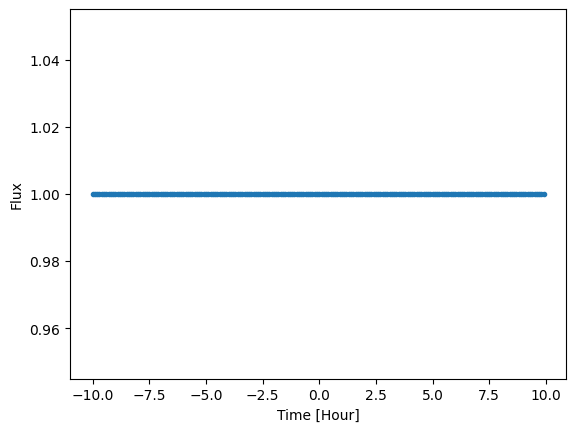

In [2]:
time_arr = np.arange(-10,10, 0.1) * u.hour
flux_arr = np.zeros(np.shape(time_arr)) + 1.0
plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")

plt.xlabel("Time [Hour]")
plt.ylabel("Flux")
plt.show()

In [3]:
tau = 2 * u.hour
t_0 = 1 * u.hour
time_start = t_0 -tau /2
time_end = t_0 + tau /2
print(time_start, time_end)

0.0 h 2.0 h


In [4]:
for i in range(len(time_arr)):
    if i <10:
     print("index =", i, "value =", time_arr[i])

index = 0 value = -10.0 h
index = 1 value = -9.9 h
index = 2 value = -9.8 h
index = 3 value = -9.700000000000001 h
index = 4 value = -9.600000000000001 h
index = 5 value = -9.500000000000002 h
index = 6 value = -9.400000000000002 h
index = 7 value = -9.300000000000002 h
index = 8 value = -9.200000000000003 h
index = 9 value = -9.100000000000003 h


In [5]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
print(ind, time_arr[ind])

(array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120]),) [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


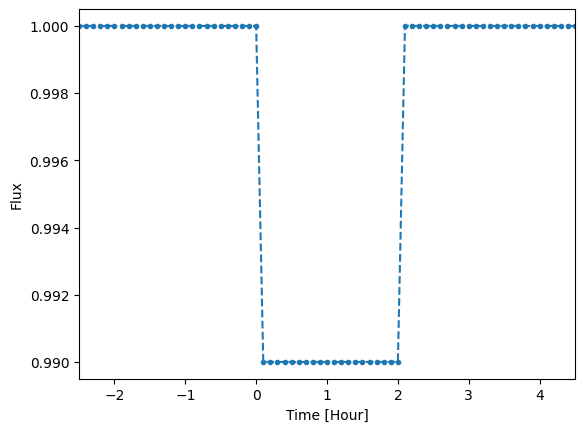

In [6]:
delta = 0.01
flux_arr[ind] = 1.0 - delta

plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")

plt.xlim(-2.5,4.5)

plt.xlabel("Time [Hour]")
plt.ylabel("Flux")
plt.show()

In [7]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta):
    flux_arr = np.zeros(np.shape(time_arr)) + 1.0
    time_start = t_0 -tau /2
    time_end = t_0 + tau /2
    ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
    flux_arr[ind] = 1.0 - delta
    return flux_arr

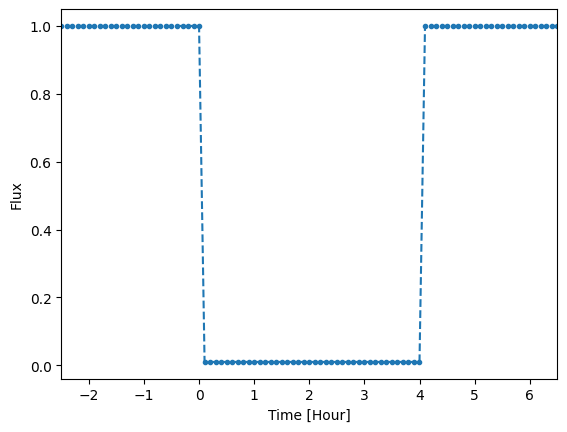

In [8]:
time_arr = np.arange(-10,10, 0.1) * u.hour
tau = 4 * u.hour
t_0 = 2 * u.hour
delta = 0.99 # this is a binary star system now lol (dark star)

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)


plt.plot(time_arr, flux_arr, linestyle = "--", marker = ".")


plt.xlim(-2.5,6.5)
plt.xlabel("Time [Hour]")
plt.ylabel("Flux")
plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving HD209458b.txt to HD209458b.txt


In [10]:
dat = astropy.io.ascii.read("HD209458b.txt")

Text(0, 0.5, 'Normalize Flux')

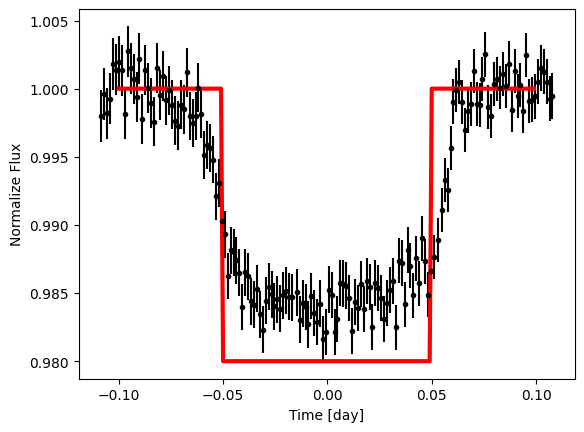

In [26]:
time = dat["col1"] - np.median(dat["col1"])
rel_mag = dat["col2"]
flux = 2.514**(1.0 - rel_mag)
err = dat["col3"]


plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none")

time_arr = np.arange(-0.10,0.10, 0.001) * u.hour
tau = 0.1 * u.hour
t_0 = 0.00 * u.hour
delta = 0.02

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)


plt.plot(time_arr, flux_arr, linewidth = "3", color = "red")

plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")

In [12]:
from google.colab import files
uploaded = files.upload()

Saving gj436b.tbl to gj436b.tbl


In [13]:
dat2 = astropy.io.ascii.read("gj436b.tbl")

In [28]:
print(dat2)

set       HJD       Relative_Flux
--- --------------- -------------
  0 2454280.6858131    0.99858714
  0 2454280.6861306    0.99893544
  0 2454280.6864482     1.0005495
  0 2454280.6867663     0.9992087
  0 2454280.6870839     0.9999951
  0 2454280.6873985    0.99963366
  0 2454280.6877158    0.99984715
  0 2454280.6880337    0.99940892
  0 2454280.6883513     1.0007346
  0 2454280.6886686     1.0005559
...             ...           ...
  0 2454280.8237639     1.0007235
  0 2454280.8240813     0.9999841
  0 2454280.8243994     1.0000403
  0 2454280.8247179     1.0002589
  0 2454280.8250325    0.99969261
  0 2454280.8253495    0.99854698
  0 2454280.8256672     1.0007293
  0  2454280.825985     1.0002464
  0 2454280.8263032     1.0004022
  0 2454280.8266176     1.0014703
Length = 445 rows


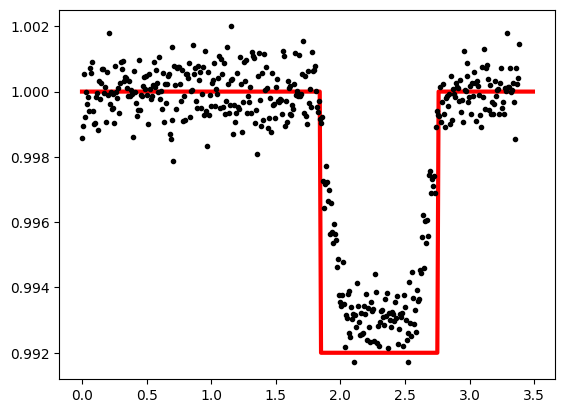

In [63]:
time_obs = dat2["HJD"]
time_obs = (time_obs - time_obs[0]) * 24 *u.hour
flux_obs = dat2["Relative_Flux"]

time_arr2 = np.arange(0,3.5, 0.01) * u.hour
tau = .9 * u.hour
t_0 = 2.3 * u.hour
delta = 0.008

flux_arr2 = generate_transit_lightcurve(time_arr2, t_0, tau, delta)


plt.plot(time_arr2, flux_arr2, linewidth = "3", color = "red")


plt.plot(time_obs, flux_obs, marker=".", color="black", linestyle="none")
